In [1]:
from ipynb.fs.full.Models import *
download = False

import matplotlib.dates as mdates
import datetime as dt

In [2]:
visual_countries = ['Italy', 'Germany', 'Spain', 'United Kingdom', 'Belgium', 'Portugal', 'France', 'US', 'Iran']

In [3]:
c_models = []

for country in visual_countries:
    c_models.append( Model(country, SIR) )
    print("")

Creating SIR for Italy
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32

Creating SIR for Germany
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41

Creating SIR for Spain
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-14 -> at day 52
VA-lockdown index: 35

Creating SIR for United Kingdom
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-23 -> at day 61
VA-lockdown index: 44

Creating SIR for Belgium
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-17 -> at day 55
VA-lockdown index: 38

Creating SIR for Portugal
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-18 -> at day 56
VA-lockdown index: 39

Creating SIR for France
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-16 -> at day 54
VA-lockdown index: 

# Time series for raw data

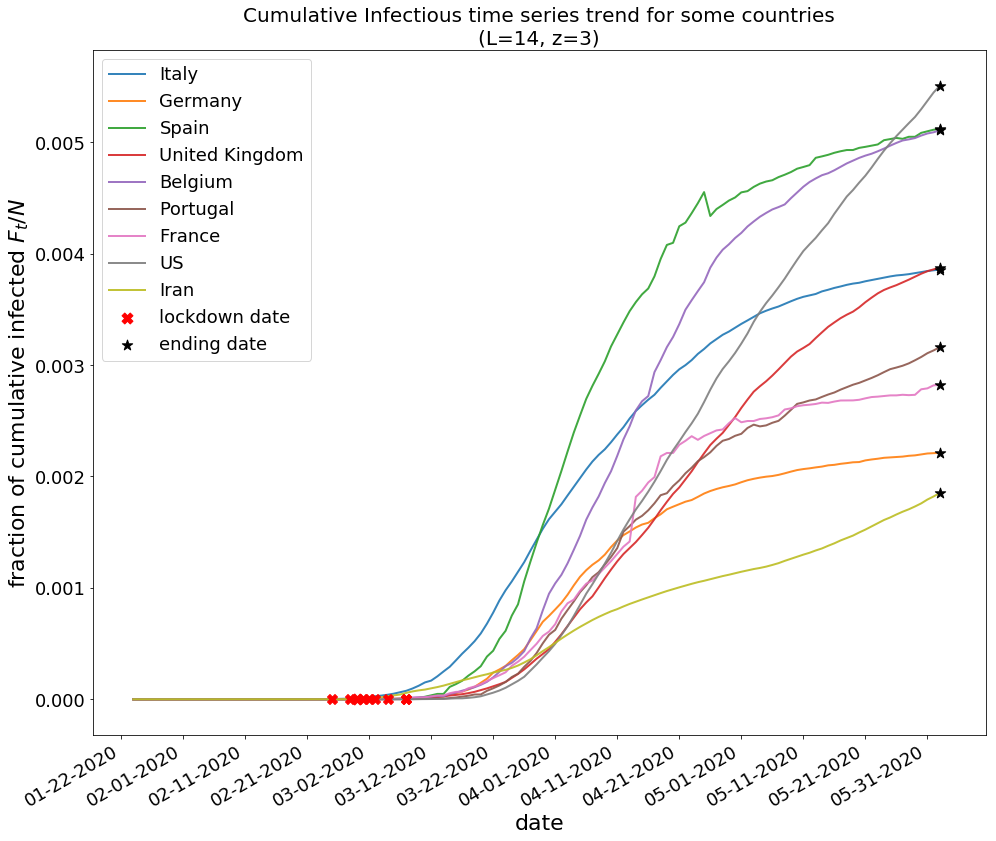

In [4]:
cs = ['red', '#ff00ee', 'blue', 'green', 'orange', 'brown']

# create date array
final = dt.datetime.strptime('Jun 3 2020', '%b %d %Y')
initial = final - dt.timedelta(days=len(c_models[0].data))
days = mdates.drange(initial,final,dt.timedelta(days=1))

plt.figure(figsize=(16,14))

for i, mod in enumerate(c_models):
    #x=range(len(mod.data))
    plt.plot(days, mod.data/mod.N, '-', label=mod.country, lw=2., alpha=0.9 ) #,  c=cs[i])
    #plt.scatter(x, mod.data/mod.N, s=15, alpha=0.7 )  #, c=cs[i])
    
    if i==len(c_models)-1:
        plt.scatter(days[mod.lock_index-L-z], mod.data[mod.lock_index-L-z]/mod.N, 
                    c='red',marker='X',s=120, zorder=20,label='lockdown date')
        plt.scatter(days[-1], mod.data[-1]/mod.N, 
                    c='black',marker='*',s=120, zorder=20, label='ending date')
    else:
        plt.scatter(days[mod.lock_index-L-z], mod.data[mod.lock_index-L-z]/mod.N, 
                    c='red',marker='X',s=100, zorder=20)
        plt.scatter(days[-1], mod.data[-1]/mod.N,
                    c='black',marker='*',s=120, zorder=20)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel('date', size=22)
plt.ylabel(r'fraction of cumulative infected $F_t / N$', size=22)
plt.title(f'Cumulative Infectious time series trend for some countries\n(L={L}, z={z})', size=20)
plt.legend(prop={'size': 18})
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('log')

plt.show()


# VA trajectories for raw data

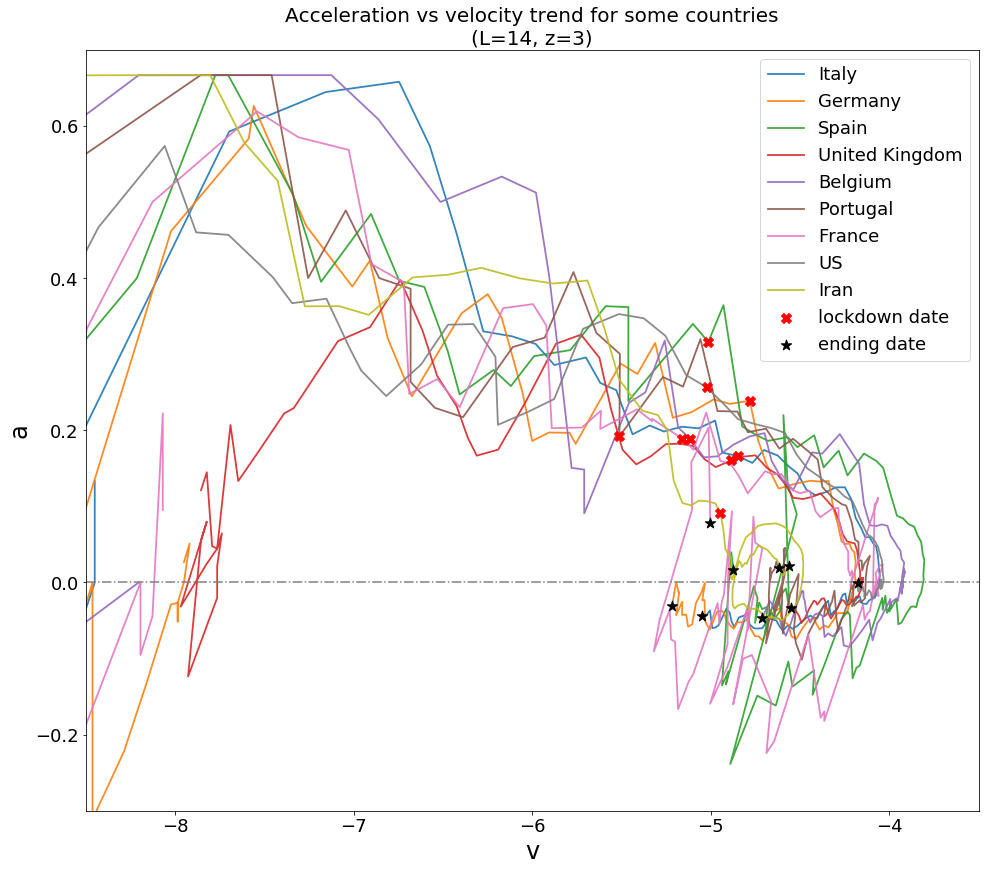

In [5]:
cs = ['red', '#ff00ee', 'blue', 'green', 'orange', 'brown']

plt.figure(figsize=(16,14))

for i, mod in enumerate(c_models):
    plt.plot(mod.v_data, mod.a_data, '-', label=mod.country, lw=1.8, alpha=0.9 )#  , c=cs[i])
    #plt.scatter(mod.v_data, mod.a_data, s=15, alpha=0.7 ) #, c=cs[i])
    
    if i==len(c_models)-1:
        plt.scatter(mod.v_data[mod.lock_index-L-z], mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20, label='lockdown date')
        plt.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')
    else:
        plt.scatter(mod.v_data[mod.lock_index-L-z], mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20)
        plt.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20)
        
plt.xlim([-8.5, -3.5])
plt.ylim([-0.3, 0.7])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(f'Acceleration vs velocity trend for some countries\n(L={L}, z={z})', size=20)
plt.legend(prop={'size': 18})
    
plt.show()

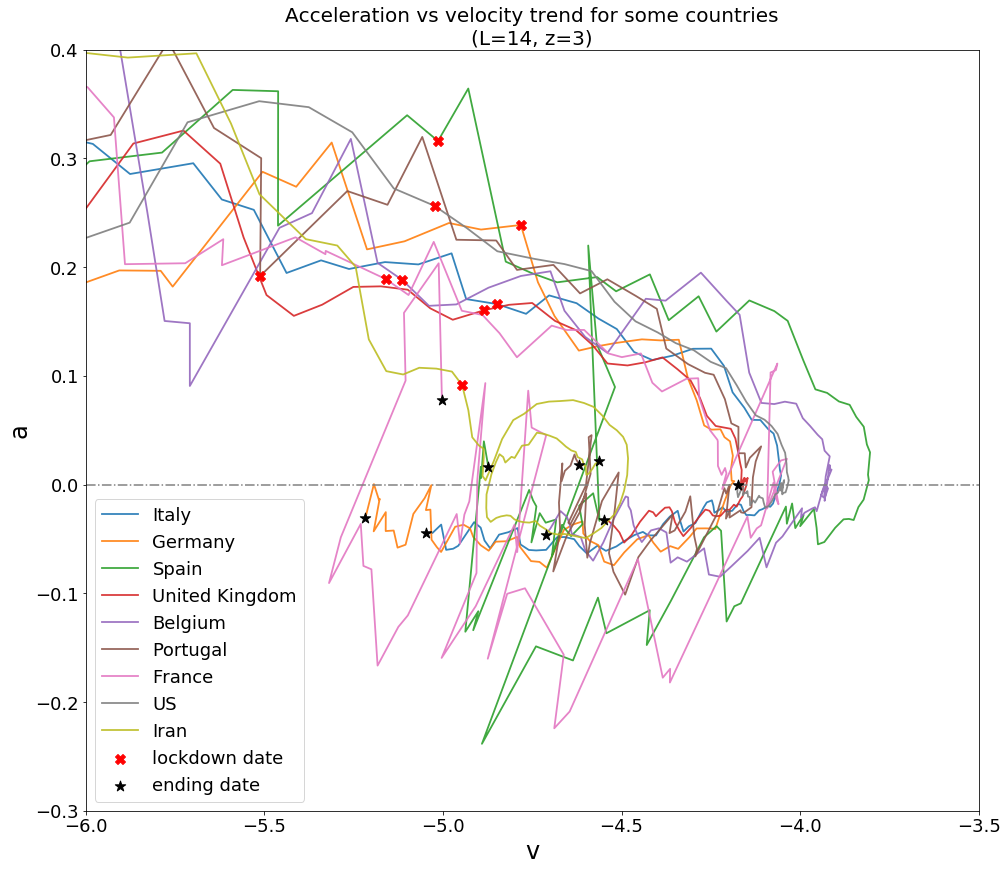

In [6]:
cs = ['red', '#ff00ee', 'blue', 'green', 'orange', 'brown']

plt.figure(figsize=(16,14))

for i, mod in enumerate(c_models):
    plt.plot(mod.v_data, mod.a_data, '-', label=mod.country, lw=1.8, alpha=0.9 ) #, c=cs[i])
    #plt.scatter(mod.v_data, mod.a_data, s=15, alpha=0.7 ) #, c=cs[i])
    
    if i==len(c_models)-1:
        plt.scatter(mod.v_data[mod.lock_index-L-z], mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20, label='lockdown date')
        plt.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')
    else:
        plt.scatter(mod.v_data[mod.lock_index-L-z], mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20)
        plt.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20)
        
plt.xlim([-6., -3.5])
plt.ylim([-0.3, 0.4])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(f'Acceleration vs velocity trend for some countries\n(L={L}, z={z})', size=20)
plt.legend(prop={'size': 18})
    
plt.show()

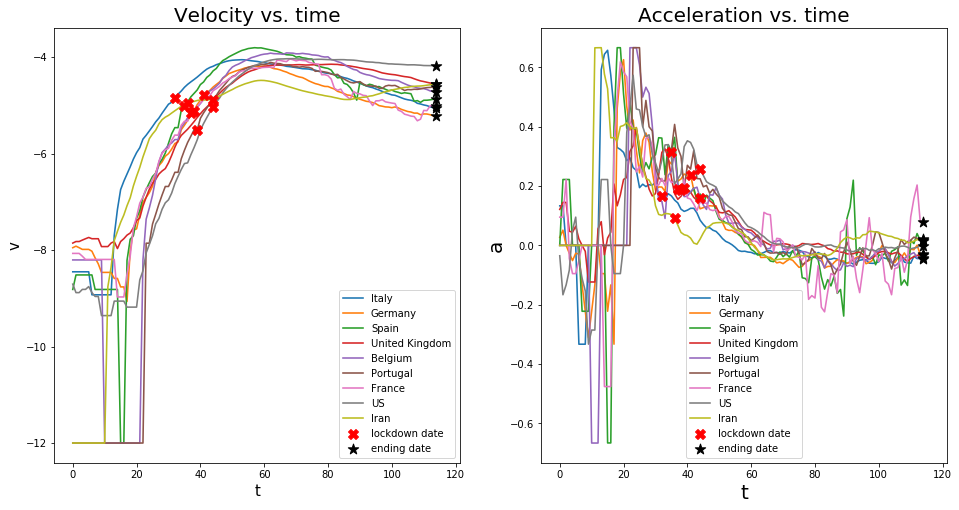

In [7]:
plt.figure(figsize=(16,8))


# V time series
plt.subplot(1,2,1)

for i, mod in enumerate(c_models):
    plt.plot(np.arange(0, mod.T_va), mod.v_data, '-', label=mod.country, lw=1.6 )  #, c=cs[i])
    #plt.scatter(mod.v_data, mod.a_data, c=cs[i])
    
    if i==len(c_models)-1:
        plt.scatter( mod.lock_index-L-z, mod.v_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20, label='lockdown date')
        plt.scatter(mod.T_va, mod.v_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')
    else:
        plt.scatter( mod.lock_index-L-z, mod.v_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20)
        plt.scatter(mod.T_va, mod.v_data[-1], 
                    c='black',marker='*',s=120, zorder=20)
        
plt.xlabel('t', size=15)
plt.ylabel('v', size=15)
plt.legend()
plt.title('Velocity vs. time', size=20)
        

# A time series
plt.subplot(1,2,2)

for i, mod in enumerate(c_models):
    plt.plot(np.arange(0, mod.T_va), mod.a_data, '-', label=mod.country, lw=1.6 ) #, c=cs[i])
    #plt.scatter(mod.v_data, mod.a_data, c=cs[i])
    
    if i==len(c_models)-1:
        plt.scatter( mod.lock_index-L-z, mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20, label='lockdown date')
        plt.scatter(mod.T_va, mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')
    else:
        plt.scatter( mod.lock_index-L-z, mod.a_data[mod.lock_index-L-z], 
                    c='red',marker='X',s=100, zorder=20)
        plt.scatter(mod.T_va, mod.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20)

plt.xlabel('t', size=20)
plt.ylabel('a', size=20)
plt.title('Acceleration vs. time', size=20)
plt.legend()
    
plt.show()

Maybe discard initial noisy days?



# Model trajectories in VA plane

### Effects of different reproduction rate

In [8]:
simpleSIR = Model('Italy', SIR, start=starts[countries=='Italy'])

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


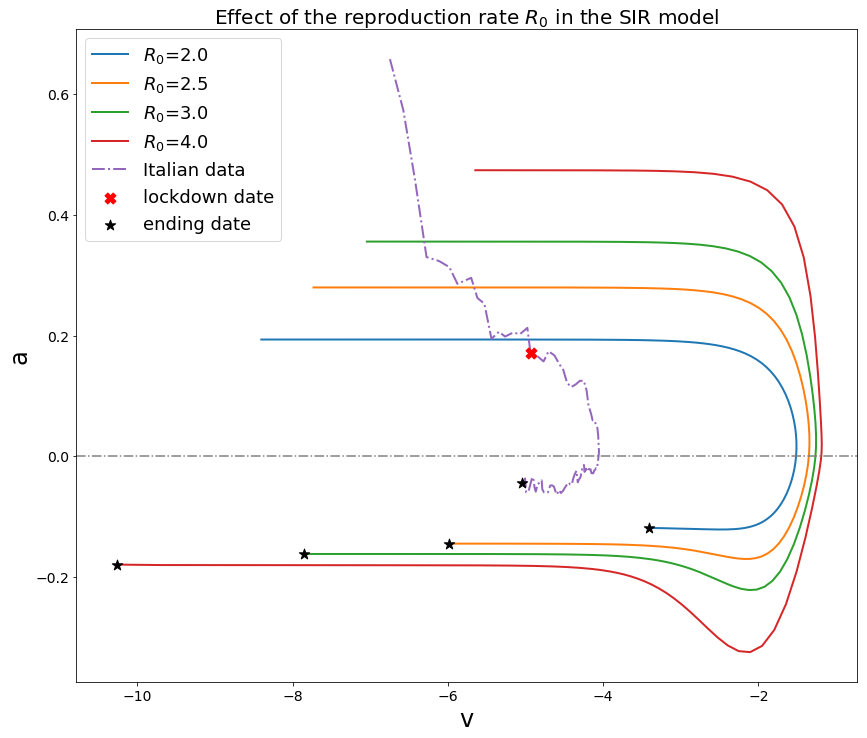

In [9]:
mu = 0.2
I0 = 1e-9

betas = [0.4, 0.5, 0.6, 0.8]

plt.figure(figsize=(14,12))

for beta in betas:
    init_params = beta, mu, I0
    simple_v, simple_a = simpleSIR.predict(init_params, T=150)
    plt.plot(simple_v, simple_a, label=r'$R_0$={:.1f}'.format(beta/mu), lw=2.)
    plt.scatter(simple_v[-1], simple_a[-1], c='black',marker='*',s=120, zorder=20)

plt.plot(simpleSIR.v_data, simpleSIR.a_data, '-.', label='Italian data', lw=2.)
plt.scatter(simpleSIR.v_data[simpleSIR.lock_index-L-z-1], simpleSIR.a_data[simpleSIR.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(simpleSIR.v_data[-1], simpleSIR.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')

#plt.xlim([-7., -3.5])
#plt.ylim([-0.15, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'Effect of the reproduction rate $R_0$ in the SIR model', size=20)
plt.legend(prop={'size': 18})

plt.show()

### Introduction of lockdown effects

In [10]:
SIRlock = Model('Italy', SIR, time='lock', start=starts[countries=='Italy'])


Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


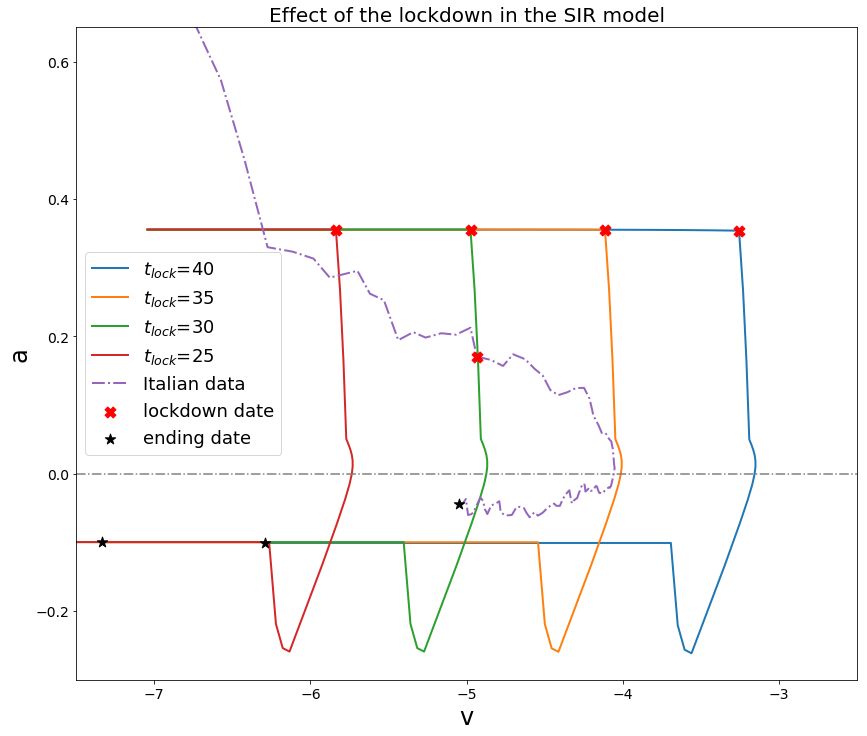

In [11]:
beta = 0.6
mu = 0.2
I0 = 1e-9
beta_lock = 0.1

ts = [40, 35, 30, 25]

plt.figure(figsize=(14,12))

for t_lock in ts:
    init_params = beta, mu, I0, t_lock, beta_lock
    simple_v, simple_a = SIRlock.predict(init_params)
    plt.plot(simple_v, simple_a, label=r'$t_{lock}$='+str(t_lock), lw=2.)
    plt.scatter(simple_v[t_lock-L-z-1], simple_a[t_lock-L-z-1], 
                    c='red',marker='X',s=120, zorder=20)
    plt.scatter(simple_v[-1], simple_a[-1], c='black',marker='*',s=120, zorder=20)
    
    
plt.plot(SIRlock.v_data, SIRlock.a_data, '-.', label='Italian data', lw=2.)
plt.scatter(SIRlock.v_data[SIRlock.lock_index-L-z-1], SIRlock.a_data[SIRlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(SIRlock.v_data[-1], SIRlock.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')

plt.xlim([-7.5, -2.5])
plt.ylim([-0.3, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'Effect of the lockdown in the SIR model', size=20)
plt.legend(prop={'size': 18})
    
plt.show()

# Introducing time-dependent infectious rate

Creating SIR for Italy
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 131 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


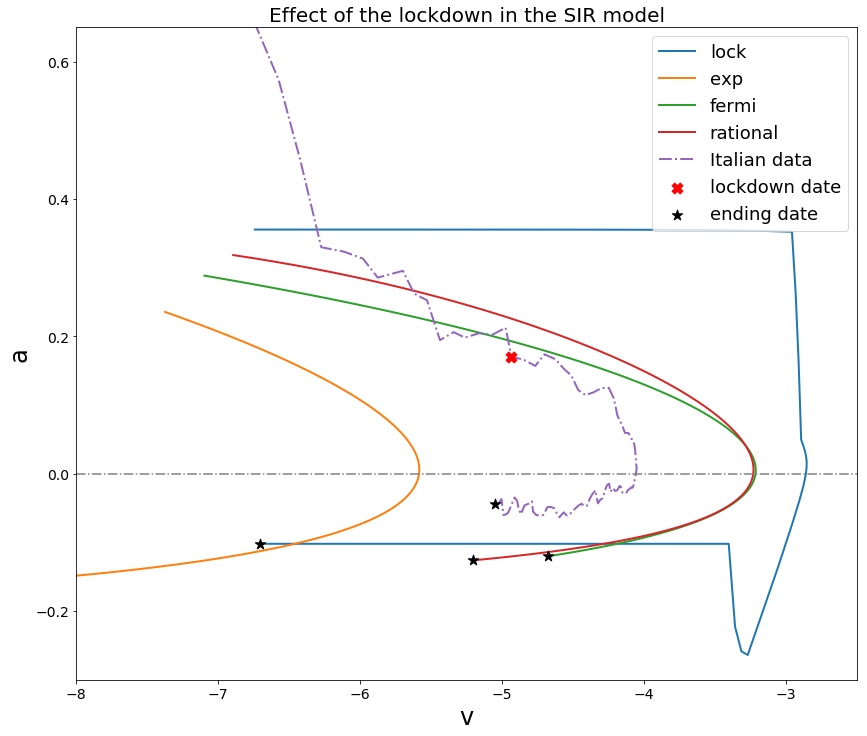

In [12]:
beta = 0.6
mu = 0.2
I0 = 2e-9
alpha = 0.02
beta_lock = 0.1
t_lock = 40
t0 = 0.

plt.figure(figsize=(14,12))

for time in times:
    mod = Model('Italy', SIR, time=time)
    
    if time == 'lock':
        init_params = beta, mu, I0, t_lock, beta_lock
    elif time == 'fermi':
        init_params = beta, mu, I0, alpha, t0
    else:
        init_params = beta, mu, I0, alpha
        
    simple_v, simple_a = mod.predict(init_params)
    plt.plot(simple_v, simple_a, label=str(time), lw=2.)
    #plt.scatter(simple_v[t_lock-L-z-1], simple_a[t_lock-L-z-1], c='red',marker='X',s=120, zorder=20)
    plt.scatter(simple_v[-1], simple_a[-1], c='black',marker='*',s=120, zorder=20)
    
    
plt.plot(SIRlock.v_data, SIRlock.a_data, '-.', label='Italian data', lw=2.)
plt.scatter(SIRlock.v_data[SIRlock.lock_index-L-z-1], SIRlock.a_data[SIRlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(SIRlock.v_data[-1], SIRlock.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')

plt.xlim([-8., -2.5])
plt.ylim([-0.3, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'Effect of the lockdown in the SIR model', size=20)
plt.legend(prop={'size': 18})
    
plt.show()

## - Decreasing exponential

In [13]:
SIRexp = Model('Italy', SIR, time='exp', start=starts[countries=='Italy'])


Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


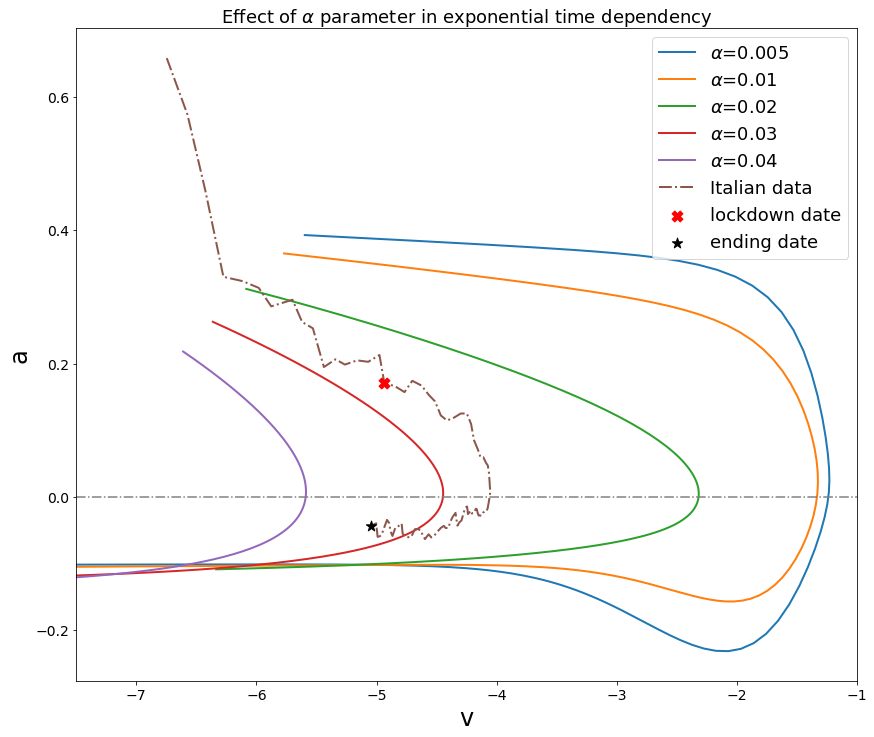

In [14]:
mu = 0.1
beta = 0.6
I0 = 1e-8

alphas = [0.005, 0.01, 0.02, 0.03, 0.04]

plt.figure(figsize=(14,12))

for alpha in alphas:
    init_params = beta, mu, I0, alpha
    
    expo = SIRexp.predict(init_params, T=200)
    
    plt.plot(expo[0], expo[1], label=r'$\alpha$='+str(alpha), lw=2.)
    

plt.plot(SIRexp.v_data, SIRexp.a_data, '-.', label='Italian data', lw=2.)
plt.scatter(SIRexp.v_data[SIRlock.lock_index-L-z-1], SIRexp.a_data[SIRlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(SIRexp.v_data[-1], SIRexp.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')


plt.xlim([-7.5, -1.])
#plt.ylim([-0.1, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.title(r'Effect of $\alpha$ parameter in exponential time dependency', size=18)
plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.show()

## - Fermi-function time dependency

In [15]:
SIRfermi = Model('Italy', SIR, time='fermi', start=starts[countries=='Italy'])

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


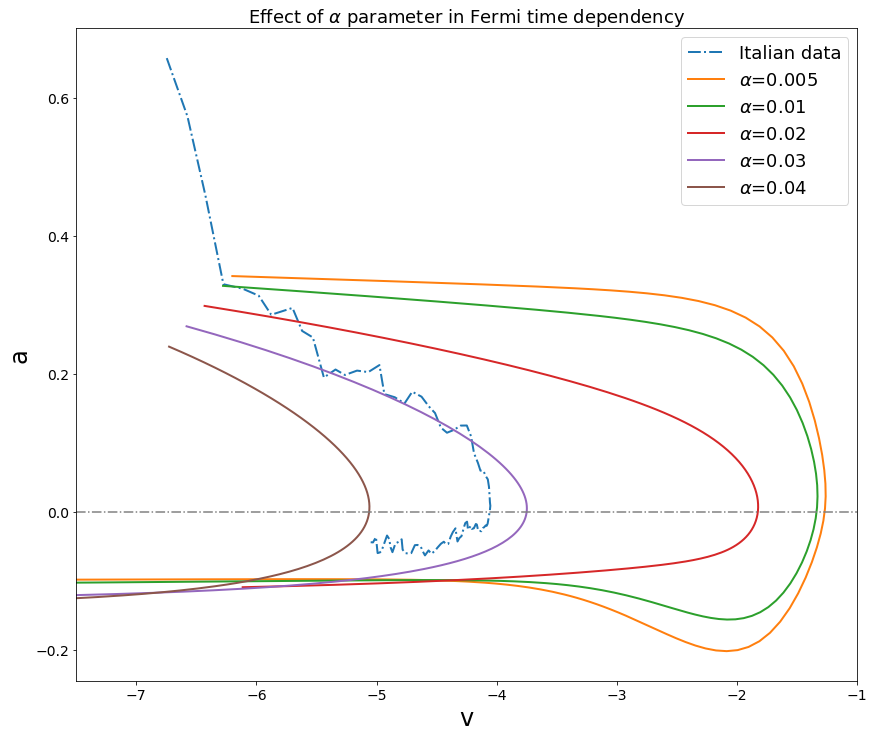

In [16]:
mu = 0.1
beta = 0.5
I0 = 1e-8
t0 = 0

alphas = [0.005, 0.01, 0.02, 0.03, 0.04]

plt.figure(figsize=(14,12))
plt.plot(SIRfermi.v_data, SIRfermi.a_data, '-.', label='Italian data', lw=2.)

for alpha in alphas:
    init_params = beta, mu, I0, alpha, t0
    
    expo = SIRfermi.predict(init_params, T=200)
    
    plt.plot(expo[0], expo[1], label=r'$\alpha$='+str(alpha), lw=2.)

plt.xlim([-7.5, -1.])
#plt.ylim([-0.1, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.title(r'Effect of $\alpha$ parameter in Fermi time dependency', size=18)
plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.show()

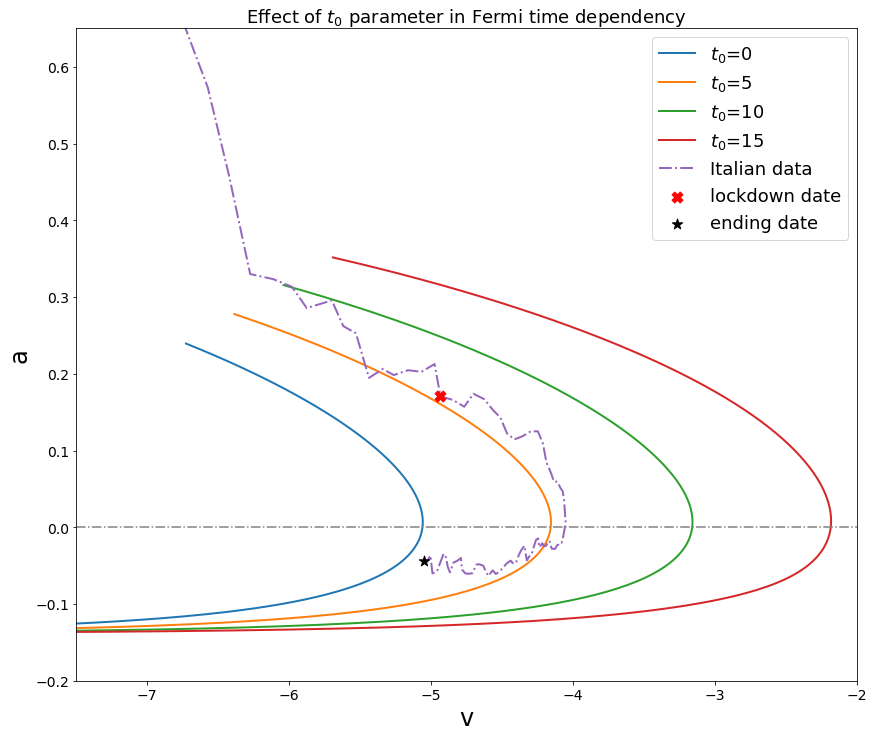

In [17]:
mu = 0.1
beta = 0.5
I0 = 1e-8
alpha = 0.04

t0s = [0, 5, 10, 15]

plt.figure(figsize=(14,12))

for t0 in t0s:
    init_params = beta, mu, I0, alpha, t0
    
    expo = SIRfermi.predict(init_params, T=200)
    
    plt.plot(expo[0], expo[1], label=r'$t_0$='+str(t0), lw=2.)
    

plt.plot(SIRfermi.v_data, SIRfermi.a_data, '-.', label='Italian data', lw=2.)
plt.scatter(SIRfermi.v_data[SIRlock.lock_index-L-z-1], SIRfermi.a_data[SIRlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(SIRfermi.v_data[-1], SIRfermi.a_data[-1], 
                    c='black',marker='*',s=120, zorder=20, label='ending date')

plt.xlim([-7.5, -2.])
plt.ylim([-0.2, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.title(f'Effect of $t_0$ parameter in Fermi time dependency', size=18)
plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.show()

The slope is almost the same for all curves as predicted, since alpha is the same. The effect of different t0 is a shift up-right in the va plane.

## - Rational time dependency

In [18]:
SIRratio = Model('Italy', SIR, time='rational', start=starts[countries=='Italy'])

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


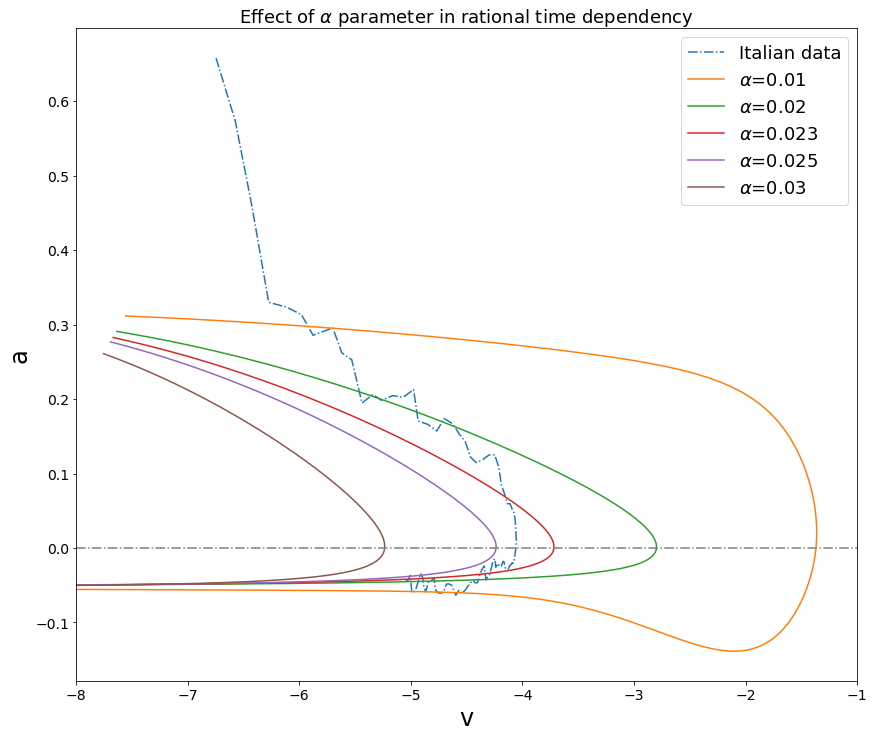

In [19]:
mu = 0.05
beta = 0.4
I0 = 1e-9

alphas = [0.01, 0.02, 0.023, 0.025, 0.03]

plt.figure(figsize=(14,12))
plt.plot(SIRratio.v_data, SIRratio.a_data, '-.', label='Italian data')

for alpha in alphas:
    init_params = beta, mu, I0, alpha
    
    expo = SIRratio.predict(init_params, T=400)
    
    plt.plot(expo[0], expo[1], label=r'$\alpha$='+str(alpha))

plt.xlim([-8., -1.])
#plt.ylim([-0.1, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.title(r'Effect of $\alpha$ parameter in rational time dependency', size=18)
plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.show()

# Complex models: SIAR/SEIAR

In [20]:
SIARlock = Model('Italy', SIAR, time='lock', start=starts[countries=='Italy'])

Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


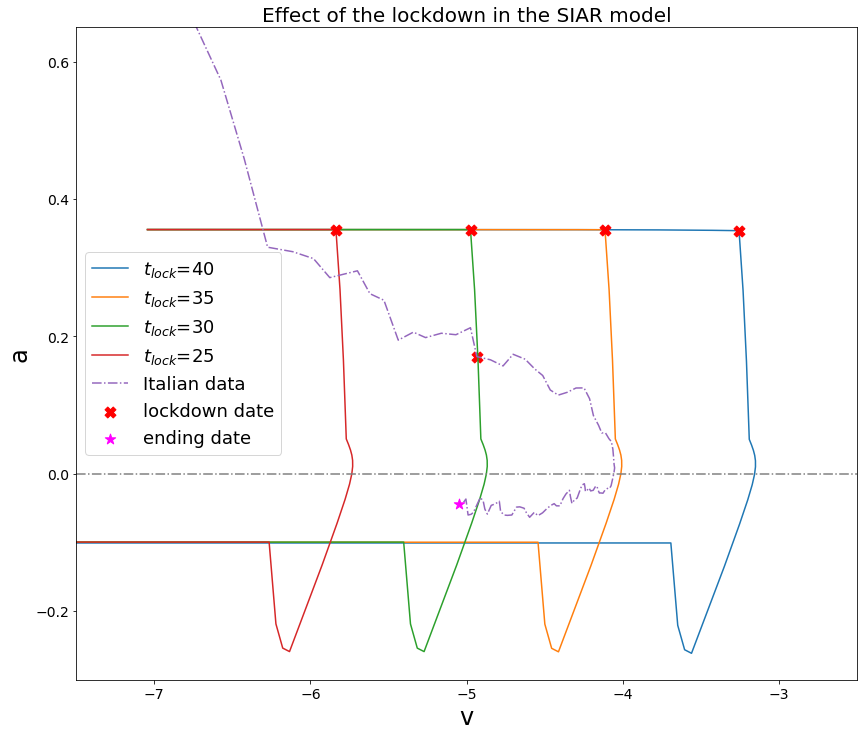

In [21]:
beta_I = 0.3
beta_A = 0.3

mu_I = 0.2
mu_A = 0.2
nu = 0.15

I0 = 1e-9

beta_lock = 0.05

ts = [40, 35, 30, 25]

plt.figure(figsize=(14,12))

for t_lock in ts:
    init_params = beta_I, beta_A, mu_I, mu_A, nu, I0, t_lock, beta_lock
    simple_v, simple_a = SIARlock.predict(init_params, T=200)
    plt.plot(simple_v, simple_a, label=r'$t_{lock}$='+str(t_lock))
    plt.scatter(simple_v[t_lock-L-z-1], simple_a[t_lock-L-z-1], 
                    c='red',marker='X',s=120, zorder=20)
    
    
plt.plot(SIARlock.v_data, SIARlock.a_data, '-.', label='Italian data')
plt.scatter(SIARlock.v_data[SIARlock.lock_index-L-z-1], SIARlock.a_data[SIARlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, label='lockdown date')
plt.scatter(SIARlock.v_data[-1], SIARlock.a_data[-1], 
                    c='magenta',marker='*',s=120,zorder=20, label='ending date')

plt.xlim([-7.5, -2.5])
plt.ylim([-0.3, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.title(r'Effect of the lockdown in the SIAR model', size=20)
    
plt.show()

In [22]:
SEIARlock = Model('Italy', SEIAR, time='lock', start=starts[countries=='Italy'])

Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32


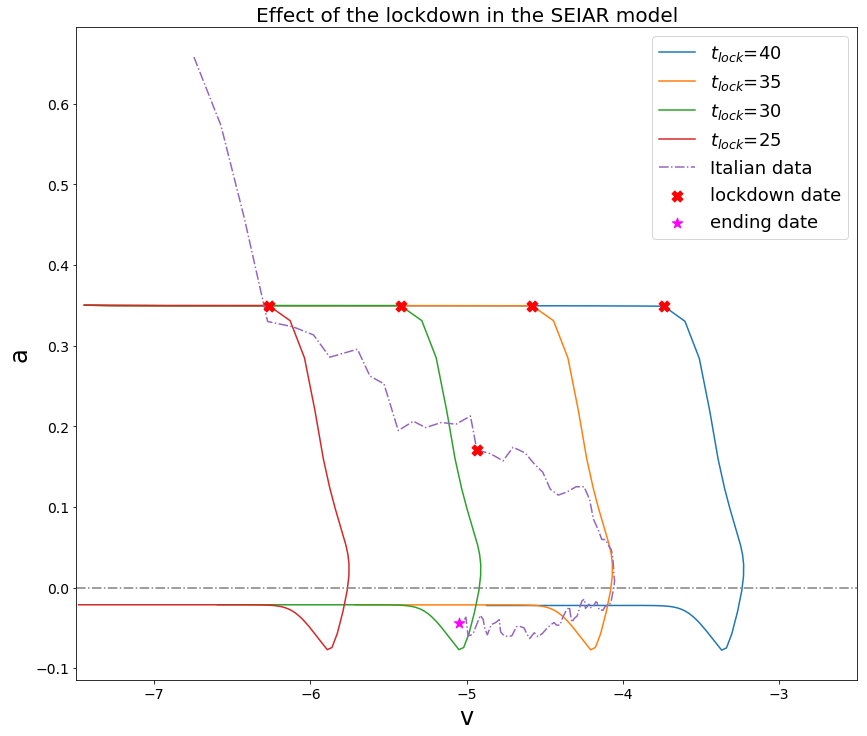

In [23]:
beta = 1.71545
gamma = 0.148293
mu_I = 0.080291
mu_A = 0.0789231
p = 0.673448
I0 = 1.06384e-09
alpha = 0.0997968
beta_lock = 0.05

ts = [40, 35, 30, 25]

plt.figure(figsize=(14,12))

for t_lock in ts:
    init_params = beta, gamma, p, mu_I, mu_A, I0, t_lock, beta_lock
    simple_v, simple_a = SEIARlock.predict(init_params, T=200)
    plt.plot(simple_v, simple_a, label=r'$t_{lock}$='+str(t_lock))
    plt.scatter(simple_v[t_lock-L-z-1], simple_a[t_lock-L-z-1], 
                    c='red',marker='X',s=120, zorder=20)
    
    
plt.plot(SEIARlock.v_data, SEIARlock.a_data, '-.', label='Italian data')
plt.scatter(SEIARlock.v_data[SEIARlock.lock_index-L-z-1], SEIARlock.a_data[SEIARlock.lock_index-L-z-1], 
                    c='red',marker='X',s=120, zorder=20, label='lockdown date')
plt.scatter(SEIARlock.v_data[-1], SEIARlock.a_data[-1], 
                    c='magenta',marker='*',s=120, zorder=20, label='ending date')

plt.xlim([-7.5, -2.5])
#plt.ylim([-0.3, 0.65])
plt.axhline(y=0, color='gray', linestyle='-.')

plt.xlabel('v', size=24)
plt.ylabel('a', size=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 18})
plt.title(r'Effect of the lockdown in the SEIAR model', size=20)
    
plt.show()